In [0]:
# univariate bidirectional lstm example
from numpy import array
from matplotlib import pyplot as plt
import pandas as pd 
import tensorflow as tf

In [0]:
# split a univariate sequence
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 

           Confrimed  Death  Recovered  Active
Date                                          
1/22/2020        555     17         28     510
1/23/2020        653     18         30     605
1/24/2020        941     26         36     879
1/25/2020       1434     42         39    1353
1/26/2020       2118     56         52    2010


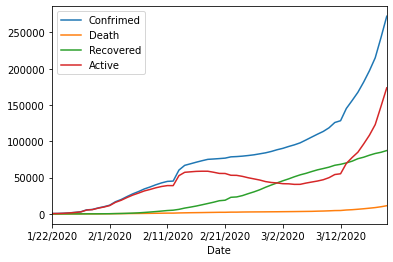

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/KadhReyA/covid19-forecasting-system/master_copy/Dataset/time_series_covid_19.csv', index_col='Date')
print(df.head())
df.plot()

In [4]:
recovered = []
active = []
for i in range(len(df.Recovered)):
  recovered.append(df.Recovered[i])
for i in range(len(df.Active)):
  active.append(df.Active[i])
print(recovered)
print(active)

[28, 30, 36, 39, 52, 61, 107, 126, 143, 222, 284, 472, 623, 852, 1124, 1487, 2011, 2616, 3244, 3946, 4683, 5150, 6295, 8058, 9395, 10865, 12583, 14352, 16121, 18177, 18890, 22886, 23394, 25227, 27905, 30384, 33277, 36711, 39782, 42716, 45602, 48228, 51170, 53796, 55865, 58358, 60694, 62494, 64404, 67003, 68324, 70251, 72624, 76034, 78088, 80840, 83207, 84854, 87256]
[510, 605, 879, 1353, 2010, 2784, 5340, 5907, 7920, 9492, 11495, 15953, 18832, 22548, 25947, 28696, 31661, 33698, 36000, 37803, 39006, 38953, 52702, 57304, 57969, 58589, 58807, 58777, 57396, 55773, 55682, 53235, 53102, 51712, 49800, 48241, 46663, 44537, 43288, 42657, 41619, 41452, 40696, 40738, 42459, 43905, 45299, 47079, 49926, 54247, 55299, 69538, 77651, 84972, 96313, 108397, 122970, 147987, 173611]


In [0]:
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(recovered, n_steps)
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [6]:
# define model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

In [7]:
# fit model
model.fit(X, y, epochs=200, verbose=0)

In [8]:
length = len(recovered)
x_input = array([recovered[length-3], recovered[length-2], recovered[length-1]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat[0][0])

91553.36


In [9]:
last_recovered = recovered[length-1]
predict = yhat
print(last_recovered)
print(predict)

87256
[[91553.36]]


In [10]:
# Recovered per Day
increase = []
for i in range(len(df.Recovered)-1):
  increase.append(df.Recovered[i+1]-df.Recovered[i])
print(increase)
increased_pred = predict - last_recovered
print(increased_pred)

[2, 6, 3, 13, 9, 46, 19, 17, 79, 62, 188, 151, 229, 272, 363, 524, 605, 628, 702, 737, 467, 1145, 1763, 1337, 1470, 1718, 1769, 1769, 2056, 713, 3996, 508, 1833, 2678, 2479, 2893, 3434, 3071, 2934, 2886, 2626, 2942, 2626, 2069, 2493, 2336, 1800, 1910, 2599, 1321, 1927, 2373, 3410, 2054, 2752, 2367, 1647, 2402]
[[4297.359375]]


In [0]:
result = []
for i in range(len(df.Recovered)-2):
  x_input = array([df.Recovered[i], df.Recovered[i+1], df.Recovered[i+2]])
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=0)
  result.append(yhat[0][0])

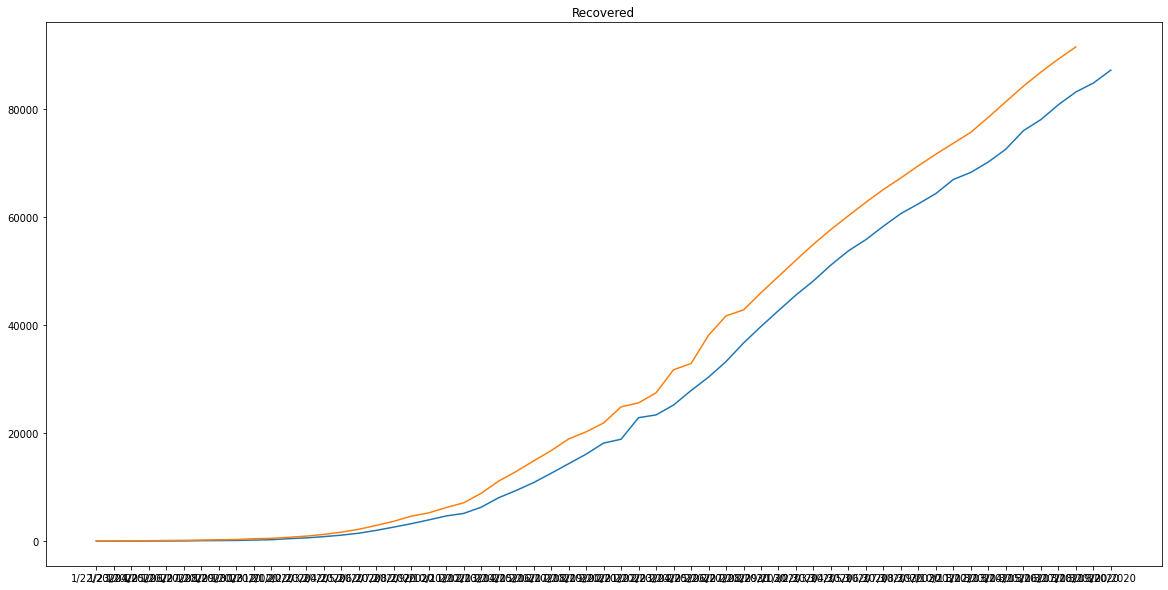

In [12]:
plt.figure(figsize=(20,10))
plt.title('Recovered')
plt.plot(df.Recovered)
plt.plot(result)
plt.show()

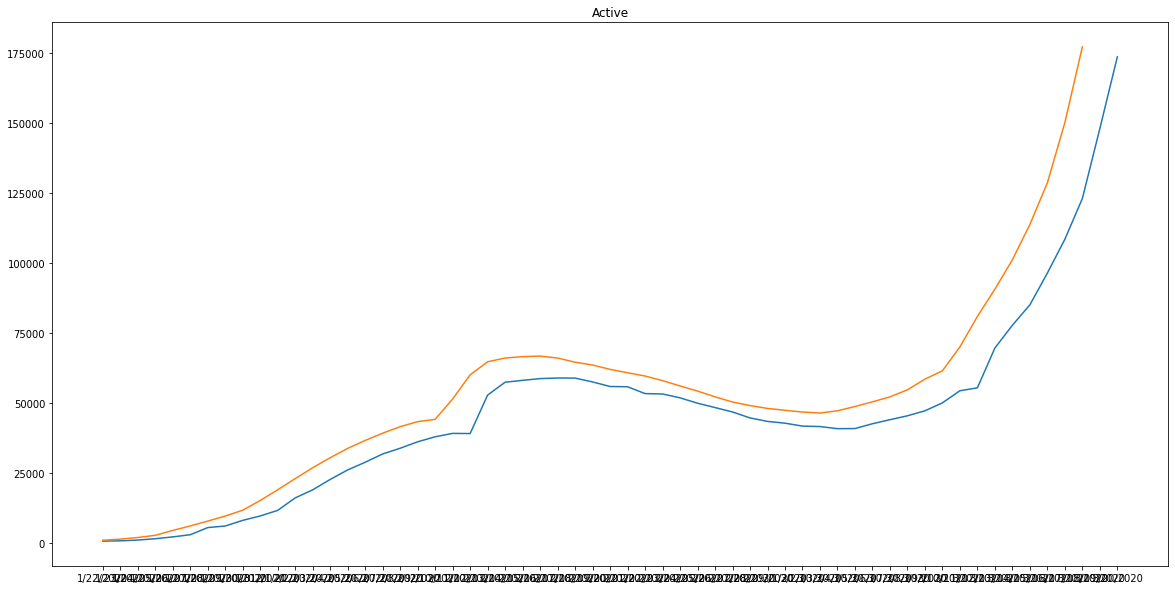

In [14]:
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(active, n_steps)
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

# define model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=200, verbose=0)

length = len(active)
x_input = array([active[length-3], active[length-2], active[length-1]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)

last_active = active[length-1]
predict = yhat

# Active per Day
increase = []
for i in range(len(df.Active)-1):
  increase.append(df.Active[i+1]-df.Active[i])
increased_pred = predict - last_active

result = []
for i in range(len(df.Active)-2):
  x_input = array([df.Active[i], df.Active[i+1], df.Active[i+2]])
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=0)
  result.append(yhat[0][0])

plt.figure(figsize=(20,10))
plt.title('Active')
plt.plot(df.Active)
plt.plot(result)
plt.show()